# Overview of multiclass training meta-estimators
- 타깃 변수가 2개 이상의 클래스로 구성된 경우의 분류 문제에 대해 설명 (다중 클래스 분류)

## The Yeast UCI dataset

In [1]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml(data_id=181, as_frame=True, return_X_y=True)

c:\Users\Cal-01\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
y.value_counts().sort_index()

class_protein_localization
CYT    463
ERL      5
EXC     35
ME1     44
ME2     51
ME3    163
MIT    244
NUC    429
POX     20
VAC     30
Name: count, dtype: int64

## Strategies comparison

In [3]:
import pandas as pd

from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.multiclass import (
    OneVsOneClassifier,
    OneVsRestClassifier,
    OutputCodeClassifier,
)
from sklearn.tree import DecisionTreeClassifier

cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=5, random_state=0)

tree = DecisionTreeClassifier(random_state=0)
ovo_tree = OneVsOneClassifier(tree)
ovr_tree = OneVsRestClassifier(tree)
ecoc = OutputCodeClassifier(tree, code_size=2)

cv_results_tree = cross_validate(tree, X, y, cv=cv, n_jobs=2)
cv_results_ovo = cross_validate(ovo_tree, X, y, cv=cv, n_jobs=2)
cv_results_ovr = cross_validate(ovr_tree, X, y, cv=cv, n_jobs=2)
cv_results_ecoc = cross_validate(ecoc, X, y, cv=cv, n_jobs=2)

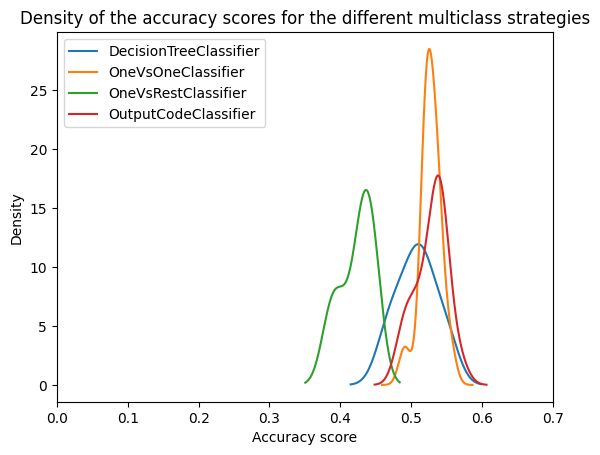

In [4]:
from matplotlib import pyplot as plt

scores = pd.DataFrame(
    {
        "DecisionTreeClassifier": cv_results_tree["test_score"],
        "OneVsOneClassifier": cv_results_ovo["test_score"],
        "OneVsRestClassifier": cv_results_ovr["test_score"],
        "OutputCodeClassifier": cv_results_ecoc["test_score"],
    }
)
ax = scores.plot.kde(legend=True)
ax.set_xlabel("Accuracy score")
ax.set_xlim([0, 0.7])
_ = ax.set_title(
    "Density of the accuracy scores for the different multiclass strategies"
)

## The importance of hyperparameters search

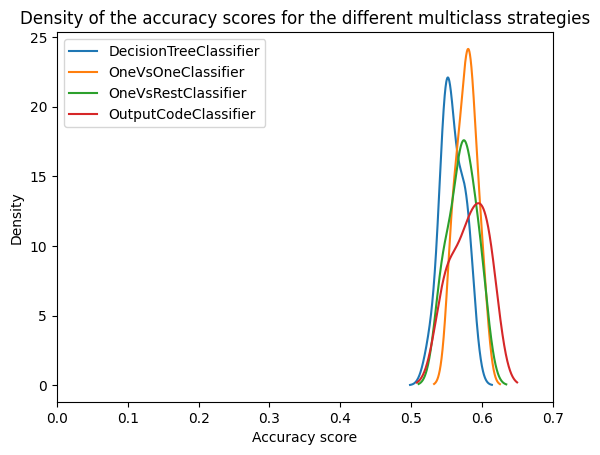

In [5]:
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth": [3, 5, 8]}
tree_optimized = GridSearchCV(tree, param_grid=param_grid, cv=3)
ovo_tree = OneVsOneClassifier(tree_optimized)
ovr_tree = OneVsRestClassifier(tree_optimized)
ecoc = OutputCodeClassifier(tree_optimized, code_size=2)

cv_results_tree = cross_validate(tree_optimized, X, y, cv=cv, n_jobs=2)
cv_results_ovo = cross_validate(ovo_tree, X, y, cv=cv, n_jobs=2)
cv_results_ovr = cross_validate(ovr_tree, X, y, cv=cv, n_jobs=2)
cv_results_ecoc = cross_validate(ecoc, X, y, cv=cv, n_jobs=2)

scores = pd.DataFrame(
    {
        "DecisionTreeClassifier": cv_results_tree["test_score"],
        "OneVsOneClassifier": cv_results_ovo["test_score"],
        "OneVsRestClassifier": cv_results_ovr["test_score"],
        "OutputCodeClassifier": cv_results_ecoc["test_score"],
    }
)
ax = scores.plot.kde(legend=True)
ax.set_xlabel("Accuracy score")
ax.set_xlim([0, 0.7])
_ = ax.set_title(
    "Density of the accuracy scores for the different multiclass strategies"
)

plt.show()